<br><br>

## 계절성 시계열 데이터에 대한 분석 : SARIMA

SARIMA : 데이터가 지닌 계절성(주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 ARIMA 모델


### 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
data['day'] = pd.to_datetime(data['day'],format="%Y-%m-%d")
data.set_index('day', inplace=True)
s_data = data


In [2]:
s_data

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298
2013-06-01,6739
2013-07-01,7107
2013-08-01,6492
2013-09-01,5693


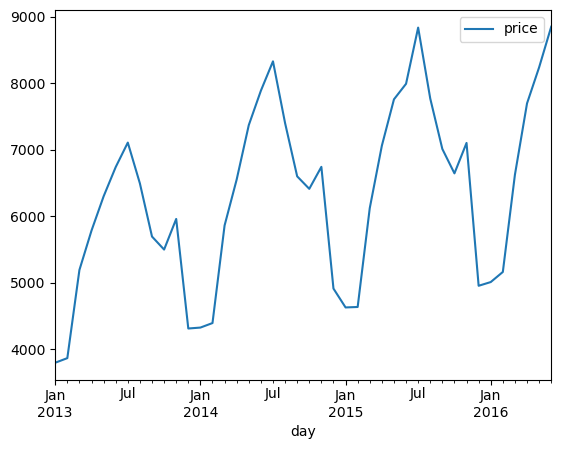

In [3]:
train_len = int(len(s_data) * 0.7)
training = s_data[:train_len]
test = s_data.drop(training.index)


import matplotlib.pyplot as plt
training.plot()
plt.show()

> SARIMAX(endog, order=(1,1,1), seasonal_order=(1,1,1,12),<br>
&emsp; &emsp; &emsp; &emsp; enforce_stationarity=False, enforce_invertibility=False)

* endog : 시계열 y값<br>
* order ((p,d,q), optional) : 각각 AR, diff, and MA 값
* seasonal_order ((P,D,Q,s), optional) : s는 계절의 기간 수를 제공하는 정수
* trend (str{'n','c','t','ct'}, optional) : 'n'은 없음,  'c'는 상수, 't'는 선형 추세, 'ct'는 둘 다

In [4]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(training.price.values, 
                  order=(2,1,2), seasonal_order=(1,1,1,12),
                  trend='ct',
                  enforce_stationarity=False, 
                  enforce_invertibility=False)

results = model.fit()
results.summary()

C:\Users\LG\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\LG\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   42
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 -90.139
Date:                              Mon, 22 May 2023   AIC                            198.277
Time:                                      16:22:55   BIC                            204.029
Sample:                                           0   HQIC                           197.745
                                               - 42                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -266.3290   2034.710     -0.131      0.896   -4254.288    3721.630
drift          8.4606     46.783      0.181      0.856     -83.232     100.153
ar.L1         -0.8331      1.054     -0.790      0.429      -2.899       1.233
ar.L2          0.0220      1.255      0.018      0.986      -2.438       2.482
ma.L1         -0.0038      9.061     -0.000      1.000     -17.763      17.755
ma.L2         -0.9264      8.803     -0.105      0.916     -18.181      16.328
ar.S.L12       0.0240      4.868      0.005      0.996      -9.518       9.566
ma.S.L12      -0.2155      6.524     -0.033      0.974     -13.002      12.571
sigma2      2.921e+04   2.26e+05      0.129      0.897   -4.15e+05    4.73e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 1.14
Prob(Q):                              0.46   Prob(JB):                         0.56
Heteroskedasticity (H):               0.93   Skew:                            -0.62
Prob(H) (two-sided):                  0.94   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<br>

### 데이터 확인

1. 시간 경과에 따른 표준화 잔차
2. 히스토그램과 표준화 된 잔차의 추정 된 밀도, 참조를 위해 그려진 Normal (0,1) 밀도.
3. 일반 기준선이있는 일반 QQ 플롯.
4. 상관도

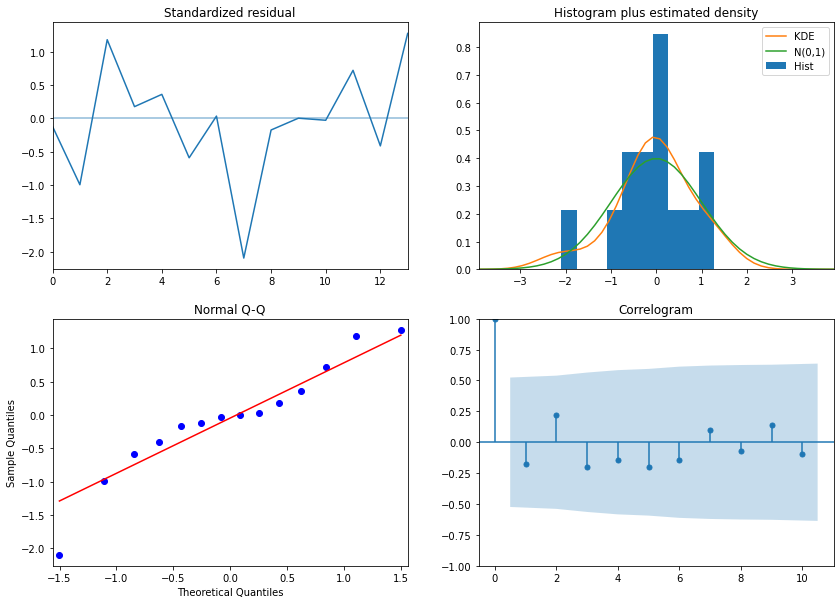

In [9]:
results.plot_diagnostics(figsize=(14, 10))
plt.show()

<br>

### 예측값, mse, 신뢰구간의 최소&최댓값

In [5]:
forecast_values = results.get_forecast(steps = len(test))

forecast_values.summary_frame()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,9486.219715,173.819939,9145.538894,9826.900535
1,8462.590085,175.765937,8118.095178,8807.084991
2,7790.393215,175.740593,7445.947982,8134.838447
3,7491.188674,176.589598,7145.079423,7837.297925
4,8027.186424,176.536474,7681.181292,8373.191555
5,5998.989169,177.144898,5651.791549,6346.186789
6,6103.266100,177.100860,5756.154793,6450.377406
7,6305.740954,177.610285,5957.631191,6653.850716
8,7882.933722,177.592933,7534.857968,8231.009475
9,9004.670727,177.921508,8655.950980,9353.390474


### 예측값을 그리는 함수

In [6]:
forecast_values

In [7]:
forecast_values.conf_int()

array([[ 9145.53889387,  9826.90053527],
       [ 8118.09517842,  8807.08499085],
       [ 7445.94798247,  8134.83844672],
       [ 7145.07942312,  7837.29792547],
       [ 7681.18129239,  8373.1915555 ],
       [ 5651.7915491 ,  6346.18678915],
       [ 5756.15479347,  6450.37740604],
       [ 5957.63119134,  6653.85071647],
       [ 7534.85796847,  8231.00947516],
       [ 8655.95097955,  9353.3904735 ],
       [ 9348.86914943, 10046.34229359],
       [ 9999.23247578, 10697.75209481],
       [10679.52328932, 11587.10235282],
       [ 9767.47133005, 10682.92289604],
       [ 9213.09074194, 10128.10974131],
       [ 9035.57886939,  9954.87278956],
       [ 9698.65898857, 10617.76524523],
       [ 7803.01691629,  8725.45315114]])

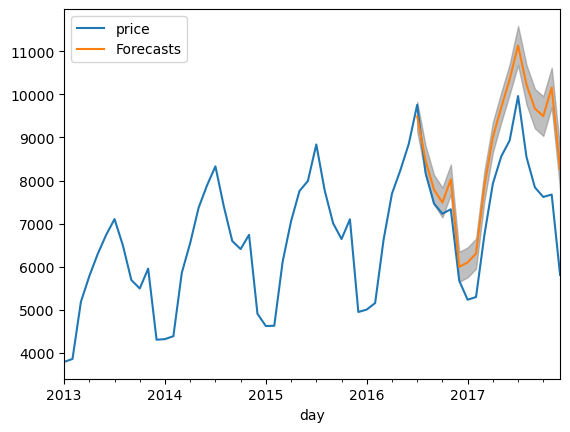

In [14]:
# pred_ci = forecast_values.conf_int()
ax = s_data.plot()
pred_ci = pd.DataFrame(forecast_values.conf_int())
pred_ci.index = list(test.index)

ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='gray', alpha=0.5)

predicted = pd.DataFrame(forecast_values.predicted_mean)
predicted.index = list(test.index)
predicted.columns = ['Forecasts']
predicted.plot(ax=ax, label = 'Forecasts')

plt.legend()
plt.show()

In [15]:
from sklearn.metrics import r2_score
r2_score(predicted, test)

0.2028461815331064